# Исследование объявлений о продаже квартир

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

## Оглавление

#### [1. Открытие файла с данными и изучение общей информации](#step1)

   [1.1. Чтение файла и просмотр общей информации о датасете](#step1.1)
    
   [1.2. Просмотр 20-ти случайных строк](#step1.2)
    
   [1.3. Просмотр описательных статистик по всем столбцам](#step1.3)
    
   [1.4. Вывод и постановка задач на предобработку](#step1.4)
    
#### [2. Предобработка данных](#step2)

   [2.1. Обработка столбца 'is_apartment'](#step2.1)
   
   [2.2 Обработка столбца 'balcony'](#step2.2)
   
   [2.3 Обработка столбца 'first_day_exposition'](#step2.3)
   
   [2.4 Обработка столбца 'locality_name'](#step2.4)
   
   [2.5 Анализ столбцов 'studio' и 'open_plan'](#step2.5)
   
   [2.6 Обработка столбца 'rooms'](#step2.6)
   
   [2.7 Проверка на наличие дубликатов](#step2.7)
   
   [2.8 Выводы](#step2.8)
   
#### [3. Дополнительные расчеты и новые столбцы](#step3)
   
   [3.1 Цена квадратного метра](#step3.1)
   
   [3.2 День недели, месяц и год публикации](#step3.2)
   
   [3.3 Этаж квартиры — первый, последний, другой](#step3.3)
   
   [3.4 Соотношение жилой площади и кухни к общей площади квартиры](#step3.4)
   
   [3.5 Добавление столбца с расстоянием до центра в км](#step3.5)
   
   [3.6 Итоги](#step3.6)
   
#### [4. Исследовательский анализ](#step4)
   
   [4.1 Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм](#step4.1)
   
   [4.2 Ответы на вопросы - сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго?](#step4.2)
   
   [4.3 Удаление редких и выбивающихся значений](#step4.3)
   
   [4.4 Зависит ли цена от площади, числа комнат, удалённости от центра. Зависимость цены от того, на каком этаже расположена квартира. Зависимость от даты размещения (дня недели, месяца и года)](#step4.4)
   
   [4.5 Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья](#step4.5)
   
   [4.6 Выделение квартир в Санкт-Петербурге. Определение, какая область входит в центр](#step4.6)
   
   [4.7 Выделение сегмента квартир в центре. Изучение параметров: площадь, цена, число комнат, высота потолков. Определение факторов, которые влияют на стоимость квартиры. Отличие выводов от общих выводов по всему городу](#step4.7)
   
#### [5. Общие выводы](#step5)  


<div class="alert alert-block alert-success">
<b>Success:</b> Отличный старт! Стоит еще добавить ссылки "в начало" для еще лучшей навигации

### 1. Открытие файла с данными и изучение общей информации<a id="step1"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1.1 Чтение файла и просмотр общей информации о датасете<a id="step1.1"></a> 

In [2]:
houseroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Во многих столбцах есть пропуски. Посмотрю процент кол-ва пропусков от общего числа строк по каждому столбцу, для наглядности отсортирую выводимые значения 

In [3]:
#houseroom.isnull().sum().sort_values()/houseroom.shape[0]*100
for column in houseroom:
    a = houseroom[column].isnull().sum()/houseroom[column].shape[0]*100
    a = a.round(2)
    if a > 0:
        print('{: <20}'.format(column), '{: >10}'.format(a))
    

ceiling_height             38.8
floors_total               0.36
living_area                8.03
is_apartment              88.29
kitchen_area               9.61
balcony                   48.61
locality_name              0.21
airports_nearest          23.38
cityCenters_nearest       23.29
parks_around3000          23.28
parks_nearest             65.91
ponds_around3000          23.28
ponds_nearest             61.56
days_exposition           13.42


#### 1.2 Просмотр 20-ти случайных строк<a id="step1.2"></a> 

In [4]:
houseroom.sample(20)

total_images  last_price  total_area first_day_exposition  rooms  \
23073            11   1450000.0        44.0  2018-02-15T00:00:00      2   
7956              5   3990000.0        38.9  2018-02-01T00:00:00      1   
9500              0   5700000.0        75.0  2018-07-02T00:00:00      3   
7808             11   3090000.0        50.0  2016-05-23T00:00:00      1   
12613            10   8449000.0        77.4  2017-07-10T00:00:00      2   
12478             1  11000000.0       120.0  2017-09-26T00:00:00      5   
16597             3   4900000.0        59.0  2017-06-01T00:00:00      3   
21058            12   3300000.0        32.0  2017-04-21T00:00:00      1   
1895             12   9500000.0       130.0  2019-03-27T00:00:00      5   
9057             20   8250000.0        78.6  2018-07-22T00:00:00      3   
3017              6  50000000.0       145.0  2018-08-10T00:00:00      5   
10712            16  12680000.0       100.0  2017-07-25T00:00:00      3   
8356             13   8200000.0        81.1  2019-04-26T00:00:00      4   
21919            15   9850000.0        96.0  2018-07-13T00:00:00      5   
12689             1   4101534.0        38.0  2017-08-07T00:00:00      1   
5182             11   2750000.0        38.1  2016-05-21T00:00:00      1   
2505             14   5650000.0        72.0  2019-02-12T00:00:00      3   
9371              2   3700000.0        61.0  2017-01-02T00:00:00      2   
8077             20  12800000.0       136.0  2017-09-25T00:00:00      5   
5083              0   3600000.0        44.5  2017-08-04T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
23073             NaN           4.0         34.0      1          NaN  ...   
7956              NaN          21.0         15.6     12          NaN  ...   
9500             2.85           6.0          NaN      6          NaN  ...   
7808             2.90           3.0         21.0      1          NaN  ...   
12613            3.00          16.0         40.1      3          NaN  ...   
12478            3.20           5.0         81.5      3          NaN  ...   
16597             NaN           6.0         36.0      4          NaN  ...   
21058            2.50           9.0         16.0      9          NaN  ...   
1895              NaN           5.0         90.0      2          NaN  ...   
9057              NaN          12.0         46.5      2          NaN  ...   
3017             2.75           9.0         72.0      8          NaN  ...   
10712            2.75          16.0         49.0      2          NaN  ...   
8356             3.40           6.0         59.6      2          NaN  ...   
21919            3.00           7.0         68.0      1        False  ...   
12689             NaN           5.0         15.0      5          NaN  ...   
5182             2.82           5.0         14.1      1        False  ...   
2505             2.65          10.0         42.0      2        False  ...   
9371             2.65          25.0         38.8      5          NaN  ...   
8077             3.30           5.0         88.0      4        False  ...   
5083             2.60           5.0         30.0      2          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
23073           6.0      NaN           Волхов               NaN   
7956           12.1      NaN  Санкт-Петербург           43731.0   
9500            NaN      NaN  Санкт-Петербург           20904.0   
7808           10.0      NaN  деревня Заневка               NaN   
12613          15.4      5.0  Санкт-Петербург           37434.0   
12478          11.5      NaN  Санкт-Петербург           26281.0   
16597           9.0      0.0  Санкт-Петербург           20643.0   
21058           8.0      NaN  Санкт-Петербург           15891.0   
1895           15.0      NaN  Санкт-Петербург               NaN   
9057           14.9      NaN  Санкт-Петербург           36361.0   
3017           26.0      NaN  Санкт-Петербург           31458.0   
10712    

#### 1.3 Просмотр описательных статистик по всем столбцам<a id="step1.3"></a> 

In [5]:
houseroom.describe().T

count          mean           std      min         25%  \
total_images         23699.0  9.858475e+00  5.682529e+00      0.0        6.00   
last_price           23699.0  6.541549e+06  1.088701e+07  12190.0  3400000.00   
total_area           23699.0  6.034865e+01  3.565408e+01     12.0       40.00   
rooms                23699.0  2.070636e+00  1.078405e+00      0.0        1.00   
ceiling_height       14504.0  2.771499e+00  1.261056e+00      1.0        2.52   
floors_total         23613.0  1.067382e+01  6.597173e+00      1.0        5.00   
living_area          21796.0  3.445785e+01  2.203045e+01      2.0       18.60   
floor                23699.0  5.892358e+00  4.885249e+00      1.0        2.00   
kitchen_area         21421.0  1.056981e+01  5.905438e+00      1.3        7.00   
balcony              12180.0  1.150082e+00  1.071300e+00      0.0        0.00   
airports_nearest     18157.0  2.879367e+04  1.263088e+04      0.0    18585.00   
cityCenters_nearest  18180.0  1.419128e+04  8.608386e+03    181.0     9238.00   
parks_around3000     18181.0  6.114075e-01  8.020736e-01      0.0        0.00   
parks_nearest         8079.0  4.908046e+02  3.423180e+02      1.0      288.00   
ponds_around3000     18181.0  7.702547e-01  9.383456e-01      0.0        0.00   
ponds_nearest         9110.0  5.179809e+02  2.777206e+02     13.0      294.00   
days_exposition      20518.0  1.808886e+02  2.197280e+02      1.0       45.00   

                            50%        75%          max  
total_images               9.00       14.0         50.0  
last_price           4650000.00  6800000.0  763000000.0  
total_area                52.00       69.9        900.0  
rooms                      2.00        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total               9.00       16.0         60.0  
living_area               30.00       42.3        409.7  
floor                      4.00        8.0         33.0  
kitchen_area               9.10       12.0        112.0  
balcony                    1.00        2.0          5.0  
airports_nearest       26726.00    37273.0      84869.0  
cityCenters_nearest    13098.50    16293.0      65968.0  
parks_around3000           0.00        1.0          3.0  
parks_nearest            455.00      612.0       3190.0  
ponds_around3000           1.00        1.0          3.0  
ponds_nearest            502.00      729.0       1344.0  
days_exposition           95.00      232.0       1580.0

#### 1.4 Вывод и постановка задач на предобработку<a id="step1.4"></a> 

Во входной таблице данных 22 столбца и 23699 строк, одна строка - данные об одной квартире. В 14 столбцах есть пропущенные значения, на первый взгляд выглядит не очень позитивно( Также есть столбцы с некорректным типом данных.

Итак, что я сделаю в предобработке:

- пропуски в апартаментах заменю на False, так как считаю, что если бы человек продавал апартаменты, то точно бы это отметил, а не пропустил;

- пропуски в балконах заменю на нули. Здесь аналогичная логика, вероятнее всего, что их просто нет в этих квартирах. Здесь же заменю тип данных с вещественного на целочисленный;

- в столбце дата публикации заменю тип данных на datetime и отброшу время, так как для решения задачи достаточно даты

- строки с пропусками в названии населенного пункта удалю, так как во-первых их мало (0,2% от общего числа), а во-вторых кому они нужны, если не известно, где эта квартира находится. Приведу значения столбца с названием населенного пункта к нижнему регистру, посмотрю уникальные значения и возможно в процессе что-то еще выявится

- удалю дубликаты, если конечно они будут


### 2. Предобработка данных<a id="step2"></a> 

#### 2.1 Обработка столбца 'is_apartment'<a id="step2.1"></a> 

In [6]:
#замена пропущенных значений на False в столбце апартаменты
houseroom['is_apartment'] = houseroom['is_apartment'].fillna(False)

#уникальные значения столбца апартаменты
houseroom['is_apartment'].unique()

array([False,  True])

#### 2.2 Обработка столбца 'balcony'<a id="step2.2"></a> 

In [7]:
#замена пропущенных значений на нули в столбце с кол-вом балконов
houseroom['balcony'] = houseroom['balcony'].fillna(0)

#уникальные значения столбца с кол-вом балконов
houseroom['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [8]:
#смена типа данных с вещественного на целочисленный в столбце с кол-вом балконов
houseroom['balcony'] = houseroom['balcony'].astype('int16')

#### 2.3 Обработка столбца 'first_day_exposition'<a id="step2.3"></a> 

In [9]:
#смена типа данных в столбце с датой публикации с отбросом времени
houseroom['first_day_exposition'] = pd.to_datetime(houseroom['first_day_exposition'], format = '%Y-%m-%d')

houseroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int16
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

#### 2.4 Обработка столбца 'locality_name'<a id="step2.4"></a> 

In [10]:
#удаляю пропуски в столбце с названием населенного пункта
houseroom = houseroom.dropna(subset = ['locality_name'])
print('Количество пропусков в столбце с названием населенного пункта: {}'.format(houseroom['locality_name'].isna().sum()))

Количество пропусков в столбце с названием населенного пункта: 0


In [11]:
print('Количество уникальных населенных пунктов до приведения к нижнему регистру: {}'.format(len(houseroom['locality_name'].unique())))

Количество уникальных населенных пунктов до приведения к нижнему регистру: 364


In [12]:
#приведу значения населенных пунктов к нижнему регистру
houseroom['locality_name'] = houseroom['locality_name'].str.lower()
print('Количество уникальных населенных пунктов после приведения к нижнему регистру: {}'.format(len(houseroom['locality_name'].unique())))

Количество уникальных населенных пунктов после приведения к нижнему регистру: 364


#### Приведение к нижнему регистру не дало никаких изменений. Посмотрю уникальные значения, может что-то бросится в глаза

In [13]:
houseroom['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

#### Заметила, что слово поселок встречается с буквами "е" и "ё". Сделаю замену "ё" на "е"

In [14]:
houseroom['locality_name'] = houseroom['locality_name'].replace('ё', 'е', regex=True)
print('Количество уникальных населенных пунктов после замены "ё" на "е": {}'.format(len(houseroom['locality_name'].unique())))

Количество уникальных населенных пунктов после замены "ё" на "е": 330


In [15]:
houseroom['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

#### Кол-во населенных пунктов уменьшилось с 364 до 330, замена "ё" на "е" дала результат

In [16]:
tip_locality_name = ['поселок ', 'городского ', 'типа ', 'станции ', 'при ', 'железнодорожной ', 'село ', 
                     'деревня ', 'городской ', 'садовое ', 'товарищество ', 'садоводческое ', 
                     'некоммерческое ', 'коттеджный '
                    ]
for i in tip_locality_name:
    houseroom['locality_name'] = houseroom['locality_name'].str.replace(i, '')

In [17]:
print('Количество уникальных населенных пунктов после удаления типа населенного пункта: {}'.format(len(houseroom['locality_name'].unique())))

Количество уникальных населенных пунктов после удаления типа населенного пункта: 305


In [18]:
houseroom['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

#### Кол-во населенных пунктов уменьшилось с 330 до 305.

#### 2.5 Анализ столбцов 'studio' и 'open_plan'<a id="step2.5"></a> 

In [19]:
houseroom['studio'].unique()

array([False,  True])

In [20]:
houseroom['open_plan'].unique()

array([False,  True])

#### В этих столбцах все хорошо, пропусков нет, значения булева типа

#### 2.6 Обработка столбца 'rooms'<a id="step2.6"></a> 

In [21]:
houseroom['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [22]:
#уберу из анализа квартиры с нулем комнат
a = houseroom.shape[0]
houseroom = houseroom.loc[houseroom['rooms'] != 0]
print('Количество отброшенных строк с нулем комнат: {}'.format(a - houseroom.shape[0]))

Количество отброшенных строк с нулем комнат: 197


#### 2.7 Проверка на наличие дубликатов<a id="step2.7"></a> 

In [23]:
print('Количество обнаруженных дубликатов: {}'.format(houseroom.duplicated().sum()))

Количество обнаруженных дубликатов: 0


#### 2.8 Выводы <a id="step2.8"></a> 

Из огромного количества пропусков в 14 столбцах мною было принято решение заполнить пропуски только в столбцах с количеством балконов и тип апартаменты. Пропуски в высоте потолка и этажности дома заполнить нет возможности, так как эти значения не зависят от значений в столбце (квартиры в одном населенном пункте со схожими параметрами по площади могут быть с разной высотой потолка и уж тем более в домах с разной этажностью). При этом в этажности пропусков мало, думаю они допущены случайно (по невнимательности), ведь странно не знать кол-во этажей в доме. А вот пропуски в высоте потолка скорее потому, что люди ее не знают и не потрудились измерить. Пропуски в жилой площади и кухни пока не стала ни на что заменять, так как в задаче далее буду вычислять их соотношение с общей площадью и возможно увижу закономерность. Пропущенные значения в названиях населенных пунктов были удалены, их не много и для дальнейшего анализа они бы мешали. Также исключены квартиры с нулем комнат. Оставшиеся пропуски заменить нет возможности, так как не достаточно данных для определения значений (например, невозможно определить расстояние до центра, имея только название населенного пункта). Тип данных заменила в балконах с вещественого на целочисленный и в столбце с датой публикации. Дубликатов обнаружено не было.

### 3. Дополнительные расчеты и новые столбцы<a id="step3"></a> 

#### 3.1 Цена квадратного метра<a id="step3.1"></a> 

In [24]:
#вычислю цену квадратного метра, поделив стоимость квартиры на общую площадь
houseroom['price_metr'] = houseroom['last_price'] / houseroom['total_area']
#значения получатся типа 'float', оценю диапазон и заменю на подходящий 'int'
houseroom['price_metr'].max()

1907500.0

In [25]:
#максимальное значение 7-значное, поэтому int16 маловато, а int32 достаточно
houseroom['price_metr'] = houseroom['price_metr'].astype('int32')
houseroom['price_metr'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_metr, dtype: int32

#### 3.2 День недели, месяц и год публикации<a id="step3.2"></a> 

In [26]:
houseroom['weekday_exposition'] = houseroom['first_day_exposition'].dt.weekday.astype('int16')
houseroom['month_exposition'] = houseroom['first_day_exposition'].dt.month.astype('int16')
houseroom['year_exposition'] = houseroom['first_day_exposition'].dt.year.astype('int16')
houseroom.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0        51.00      8         False  ...   
1             NaN          11.0        18.60      1         False  ...   
2             NaN           5.0        34.30      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0        32.00     13         False  ...   
5             NaN          12.0        14.40      5         False  ...   
6             NaN          26.0        10.60      6         False  ...   
7             NaN          24.0          NaN     22         False  ...   
8             NaN          27.0        15.43     26         False  ...   
9            2.50           9.0        43.60      7         False  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   
5                  NaN               NaN            NaN               NaN   
6              19143.0               0.0            NaN               0.0   
7              11634.0               0.0            NaN               0.0   
8                  NaN               NaN            NaN               NaN   
9              15008.0               0.0            NaN               0.0   

  ponds_nearest  days_exposition  price_metr  weekday_exposition  \
0         755.0              NaN      120370                   3   
1           NaN             81.0       82920                   1   
2         574.0            558.0       92785                   3   
3         234.0            424.0      408176                   4   
4          48.0            121.0      100000                   1   
5           NaN             55.0       95065                   0   
6           NaN            155.0       99195                   3   
7           NaN              NaN      110544                   3   
8           NaN            189.0       87454                   2   
9           NaN            289.0       88524                   6   

   month_exposition  year_exposition  
0                 3             2019  
1                12             2018  
2                 8             2015  
3                 7             2015  
4                 6             2018  
5                 9             2018  
6                11             2017  
7                 4             2019  
8                 5             2018  
9                 2             2017  

[10 rows x 26 columns]

#### 3.3 Этаж квартиры — первый, последний, другой<a id="step3.3"></a> 

In [27]:
#напишу функцию, которая будет сравнивать значения столбцов этаж и этажность и определять тип этажа
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#вызову функцию и одновременно добавлю столбец с получившимися значениями
houseroom['type_floor'] = houseroom.apply(type_floor, axis=1)
print('Количество пропусков в столбце с типом этажа: {}'.format(houseroom['type_floor'].isnull().sum()))

Количество пропусков в столбце с типом этажа: 0


#### 3.4 Соотношение жилой площади и кухни к общей площади квартиры<a id="step3.4"></a> 

In [28]:
houseroom['part_living_area'] = houseroom['living_area'] / houseroom['total_area']
print('Количество пропусков в столбце с частью жилой площади: {}'.format(houseroom['part_living_area'].isnull().sum()))

Количество пропусков в столбце с частью жилой площади: 1884


In [29]:
houseroom['part_kitchen_area'] = houseroom['kitchen_area'] / houseroom['total_area']
print('Количество пропусков в столбце с частью кухни: {}'.format(houseroom['part_kitchen_area'].isnull().sum()))

Количество пропусков в столбце с частью кухни: 2072


#### 3.5 Добавление столбца с расстоянием до центра в км <a id="step3.5"></a> 

In [30]:
houseroom['cityCenters_nearest_km'] = (houseroom['cityCenters_nearest']/1000).round(0)
houseroom.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   ponds_nearest  days_exposition  price_metr  weekday_exposition  \
0          755.0              NaN      120370                   3   
1            NaN             81.0       82920                   1   
2          574.0            558.0       92785                   3   
3          234.0            424.0      408176                   4   
4           48.0            121.0      100000                   1   

  month_exposition  year_exposition  type_floor  part_living_area  \
0                3             2019      другой          0.472222   
1               12             2018      первый          0.460396   
2                8             2015      другой          0.612500   
3                7             2015      другой               NaN   
4                6             2018      другой          0.320000   

   part_kitchen_area  cityCenters_nearest_km  
0           0.231481                    16.0  
1           0.272277                    19.0  
2           0.148214                    14.0  
3                NaN                     7.0  
4           0.410000                     8.0  

[5 rows x 30 columns]

#### 3.6 Итоги <a id="step3.6"></a> 

В соответствии с заданием вычислены: цена за квадратный метр; день недели, месяц и год даты публикации; тип этажа; доля жилой площади и кухни от общей площади квартиры; добавлен столбец с расстоянием до центра в км.

### 4. Исследовательский анализ<a id="step4"></a> 

#### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм<a id="step4.1"></a> 

In [31]:
houseroom[['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_metr']].describe()

total_area    last_price         rooms  ceiling_height    price_metr
count  23453.000000  2.345300e+04  23453.000000    14408.000000  2.345300e+04
mean      60.589877  6.568035e+06      2.087494        2.769392  9.935552e+04
std       35.618736  1.092836e+07      1.066253        1.248634  5.047724e+04
min       12.000000  1.219000e+04      1.000000        1.000000  1.110000e+02
25%       40.110000  3.450000e+06      1.000000        2.510000  7.647000e+04
50%       52.000000  4.650000e+06      2.000000        2.650000  9.489700e+04
75%       70.000000  6.800000e+06      3.000000        2.800000  1.141020e+05
max      900.000000  7.630000e+08     19.000000      100.000000  1.907500e+06

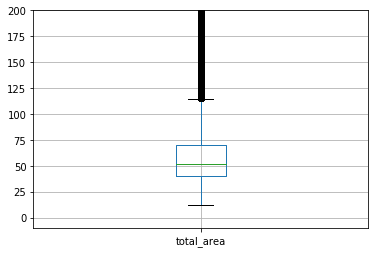

In [32]:
plt.ylim(-10, 200)
houseroom.boxplot('total_area')

#### Большая часть значений лежит в диапазоне до 75 кв.м. Выглядит правдоподобно. Первый квартиль на уровне 40 кв.м., что тоже нормально. Есть выбросы после 115 кв.м и особо выделяется максимальное значение в 900 квадратов

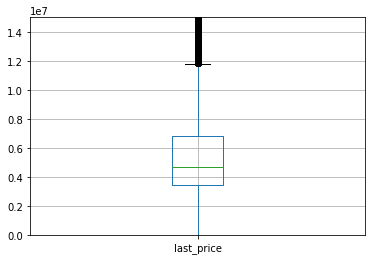

In [33]:
plt.ylim(-10, 15000000)
houseroom.boxplot('last_price')

#### Большая часть значений лежит в диапазоне от 3,5 до 7 млн. Выглядит правдоподобно. Есть выбросы после 12 млн, особо выделяется максимальное значение в 763 млн (видимо за 900 кв.м).

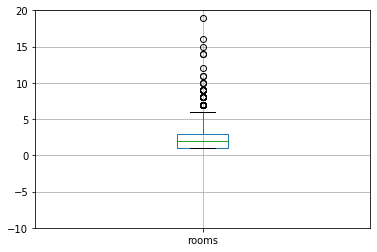

In [34]:
plt.ylim(-10, 20)
houseroom.boxplot('rooms')

#### С комнатами тоже все понятно, бОльшая часть это 1-2-3 комнатные квартиры. Интересно, что есть выбросы в виде 10, 15 или 19 комнат.

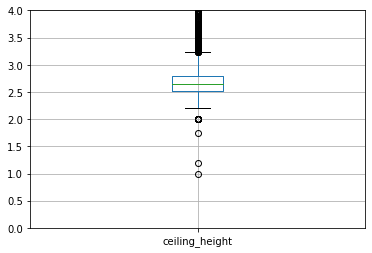

In [35]:
plt.ylim(0, 4)
houseroom.boxplot('ceiling_height')

#### Выбросы за пределами 3,5 метров и до 2 метров, что вполне логично. Максимальное значение в 100 метров и минимальное в 1 метр - явные артефакты. Основные значения расположились в диапазоне от 2,5 до 2,7 м, что соответствует реальности.

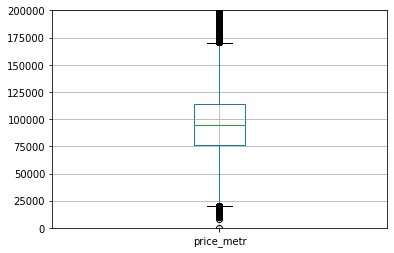

In [36]:
plt.ylim(-10, 200000)
houseroom.boxplot('price_metr')

#### Выбросы за пределами 175 тыс и до 25 тыс, что выглядит правдоподобно. Основные значения расположились в диапазоне от 75 до 115 тыс.

#### 4.2 Ответы на вопросы - сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго? <a id="step4.2"></a> 

In [37]:
houseroom['days_exposition'].describe()

count    20287.000000
mean       181.398827
std        220.147815
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

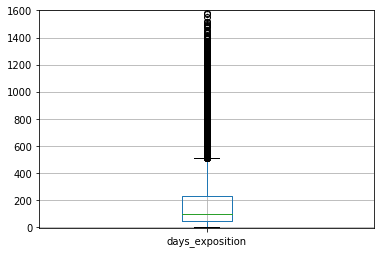

In [38]:
plt.ylim(-5, 1600)
houseroom.boxplot('days_exposition')

In [39]:
q1 = houseroom['days_exposition'].quantile(0.25)                 
q3 = houseroom['days_exposition'].quantile(0.75)
a = q1 - (q3 - q1) * 1.5
b = q3 + (q3 - q1) * 1.5

if a > houseroom['days_exposition'].min():
    fast = a
else:
    fast = houseroom['days_exposition'].min()
    
if b < houseroom['days_exposition'].max():
    long = b
else:
    long = houseroom['days_exposition'].max()

print('Быстрой можно считать продажу за {:.0f} день'.format(fast))
print('Долгой можно считать продажу более {:.0f} дней'.format(long))

Быстрой можно считать продажу за 1 день
Долгой можно считать продажу более 512 дней


Медиана - 96 дней, среднее - 181 день. В целом квартиры продаются в диапазоне от 1,5 до 8 месяцев.

#### 4.3 Удаление редких и выбивающихся значений<a id="step4.3"></a> 

#### Изучая параметры в предыдущих пунктах были замечены странные значения в виде 100 м потолка или 19-комнатной квартиры. Все максимальные и минимальные значения неправдободобны.

In [40]:
#напишу функцию для получения данных без выбросов по заданному столбцу 
def clean(df, columns):
    minimum = df[columns].min()      #вычисляю минимум по столбцу
    maximum = df[columns].max()      #вычисляю максимум по столбцу
    q1 = df[columns].quantile(0.25)  #вычисляю первый квартиль
    q3 = df[columns].quantile(0.75)  #вычисляю третий квартиль
    a = q1 - (q3 - q1) * 1.5         #возможная длина левого уса диаграммы размаха
    b = q3 + (q3 - q1) * 1.5         #возможная длина правого уса диаграммы размаха
    c = max(a, minimum)              #выбираю нижнюю границу, как максимум из минимума по столбцу и длиной левого уса
    d = min(b, maximum)              #выбираю верхнюю границу, как минимум из максимума по столбцу и длиной правого уса
    clean_columns = (df[columns] >= c) & (df[columns] <= d) #условие среза
    return df.loc[clean_columns]

In [41]:
#используя функцию отрезаем выбросы по столбцам площадь, цена общая и за кв.метр, кол-во комнат, высота потолков и дней публ-ции
houseroom_clean = clean(houseroom, 'total_area')
houseroom_clean = clean(houseroom_clean, 'last_price')
houseroom_clean = clean(houseroom_clean, 'rooms')
houseroom_clean = clean(houseroom_clean, 'ceiling_height')
houseroom_clean = clean(houseroom_clean, 'days_exposition')
houseroom_clean = clean(houseroom_clean, 'price_metr')
print('Количество отброшенных строк после удаления выбросов: {}'.format(houseroom.shape[0] - houseroom_clean.shape[0]))

Количество отброшенных строк после удаления выбросов: 14348


In [42]:
houseroom_clean[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'price_metr']].describe()

total_area    last_price        rooms  ceiling_height  \
count  9105.000000  9.105000e+03  9105.000000     9105.000000   
mean     51.349533  4.659236e+06     1.893904        2.642238   
std      16.374758  1.841525e+06     0.853216        0.148267   
min      13.000000  7.500000e+05     1.000000        2.200000   
25%      38.700000  3.400000e+06     1.000000        2.500000   
50%      48.000000  4.350000e+06     2.000000        2.600000   
75%      61.000000  5.650000e+06     2.000000        2.700000   
max     114.800000  1.065000e+07     6.000000        3.120000   

       days_exposition     price_metr  
count      9105.000000    9105.000000  
mean        125.117957   91795.735859  
std         117.715649   24706.791278  
min           1.000000   27514.000000  
25%          38.000000   76530.000000  
50%          83.000000   92857.000000  
75%         179.000000  107826.000000  
max         498.000000  156862.000000

#### Исключены выбросы, минимальные и максимальные значения выглядят адекватно.

#### 4.4 Ответ на вопрос - какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от площади, числа комнат, удалённости от центра. Зависимость цены от того, на каком этаже расположена квартира. Зависимость от даты размещения (дня недели, месяца и года) <a id="step4.4"></a> 

Коэффициент корреляции между ценой и площадью: 0.71


Text(0, 0.5, 'цена')

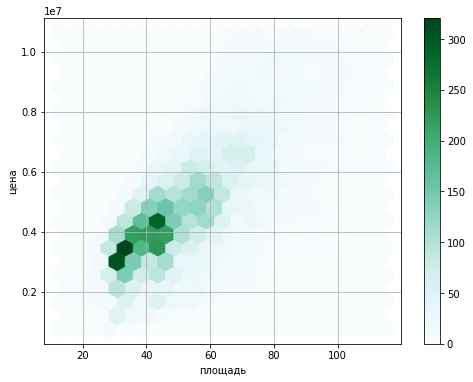

In [43]:
print('Коэффициент корреляции между ценой и площадью: {:.2f}'.format(houseroom_clean['total_area'].corr(houseroom_clean['last_price'])))
houseroom_clean.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel('площадь')
plt.ylabel('цена')

#### Конечно же цена зависит от площади - чем больше площадь, тем выше цена (коэффициент Пирсона равен 0,71). Самые густые зоны это квартиры 30-35 кв.м с ценой 3-3,5 млн и 40-45 кв.м с ценой 4,5 млн.

Коэффициент корреляции между ценой и кол-вом комнат: 0.46
Коэффициент корреляции между ценой за 1 кв.м и кол-вом комнат: -0.27


Text(0, 0.5, 'цена')

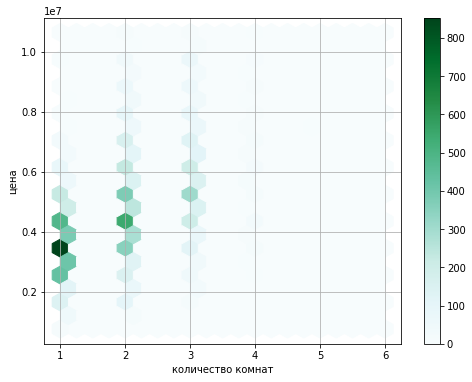

In [44]:
print('Коэффициент корреляции между ценой и кол-вом комнат: {:.2f}'.format(houseroom_clean['rooms'].corr(houseroom_clean['last_price'])))
print('Коэффициент корреляции между ценой за 1 кв.м и кол-вом комнат: {:.2f}'.format(houseroom_clean['rooms'].corr(houseroom_clean['price_metr'])))
houseroom_clean.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel('количество комнат')
plt.ylabel('цена')

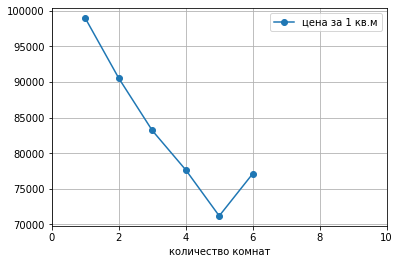

In [45]:
houseroom_clean_group_rooms = houseroom_clean.pivot_table(index='rooms', values='price_metr', aggfunc=['mean'])
houseroom_clean_group_rooms.reset_index(level=0, inplace=True)
houseroom_clean_group_rooms.columns = ['количество комнат','цена за 1 кв.м']
houseroom_clean_group_rooms.plot(x='количество комнат', y='цена за 1 кв.м', style='o-', xlim=(0, 10), grid=True)

#### Наблюдается обратная зависимость средней цены за квадратный метр от количества комнат. "Оптом" дешевле)

Коэффициент корреляции между ценой и удаленностью от центра: -0.30


Text(0, 0.5, 'цена')

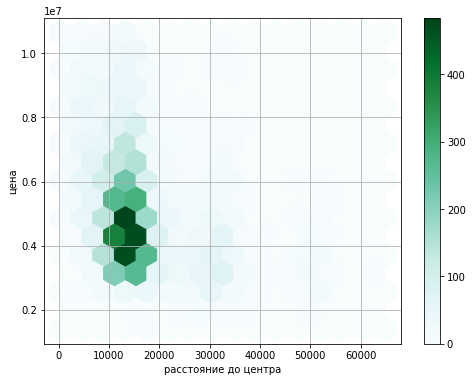

In [46]:
print('Коэффициент корреляции между ценой и удаленностью от центра: {:.2f}'.format(houseroom_clean['cityCenters_nearest'].corr(houseroom_clean['last_price'])))
houseroom_clean.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel('расстояние до центра')
plt.ylabel('цена')

#### Наблюдается очень слабая обратная связь цены от удаленности от центра. Объсню это тем, что дальше от центра может быть квартира большей площадью и соответственно иметь выше стоимость, чем маленькая квартира близко к центру. Густая зона расположена в 12-17 км от центра с диапазоном цен от 3,5 до 5 млн.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'цена')

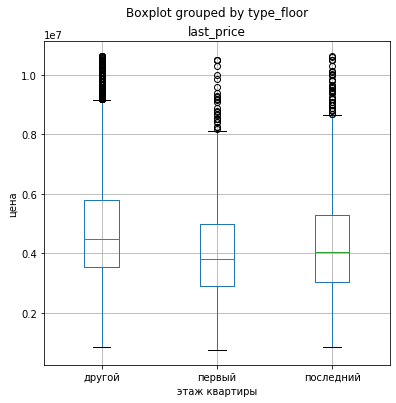

In [47]:
houseroom_clean.boxplot('last_price', by='type_floor',figsize=(6,6))
plt.xlabel('этаж квартиры')
plt.ylabel('цена')

#### Самые дешевые квартиры только на первом этаже.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'цена')

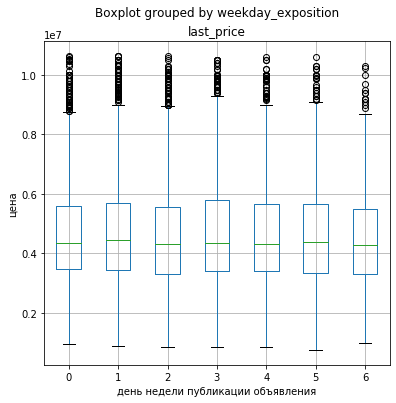

In [48]:
houseroom_clean.boxplot('last_price', by='weekday_exposition',figsize=(6,6))
plt.xlabel('день недели публикации объявления')
plt.ylabel('цена')

#### День недели публикации объявления никак не влияет на стоимоть квартиры. Можно отметить, что объявлений, опубликованных в воскресенье меньше всего, вероятно потому что это выходной.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'цена')

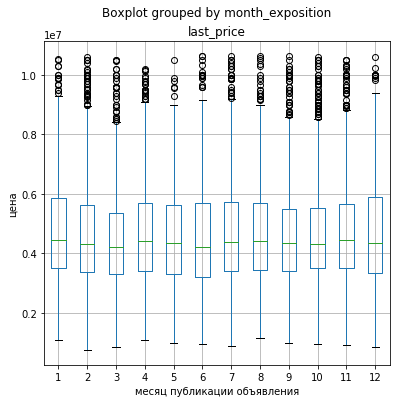

In [49]:
houseroom_clean.boxplot('last_price', by='month_exposition',figsize=(6,6))
plt.xlabel('месяц публикации объявления')
plt.ylabel('цена')

#### Никакой зависимости цены от месяца публикации.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'цена')

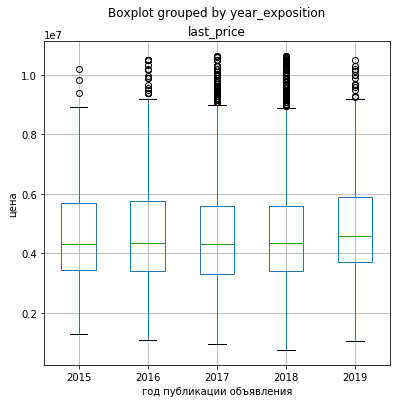

In [50]:
houseroom_clean.boxplot('last_price', by='year_exposition',figsize=(6,6))
plt.xlabel('год публикации объявления')
plt.ylabel('цена')

#### Аналогично никакой зависимости от года публикации, только если небольшой рост цен в целом в 2019 году по отношению к предыдущим.

#### 4.5 Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья <a id="step4.5"></a> 

In [51]:
#группирую по населенным пунктам, считаю кол-во объявлений в группах, сортирую по кол-ву объявлений в группах
houseroom_clean.groupby('locality_name').count().sort_values(by = 'last_price', ascending = False).head(10)

total_images  last_price  total_area  first_day_exposition  \
locality_name                                                                 
санкт-петербург          6068        6068        6068                  6068   
всеволожск                193         193         193                   193   
мурино                    188         188         188                   188   
шушары                    173         173         173                   173   
колпино                   161         161         161                   161   
кудрово                   154         154         154                   154   
пушкин                    148         148         148                   148   
парголово                 115         115         115                   115   
гатчина                   110         110         110                   110   
петергоф                  107         107         107                   107   

                 rooms  ceiling_height  floors_total  living_area  floor  \
locality_name                                                              
санкт-петербург   6068            6068          6067         5752   6068   
всеволожск         193             193           193          180    193   
мурино             188             188           188          181    188   
шушары             173             173           172          167    173   
колпино            161             161           161          155    161   
кудрово            154             154           154          146    154   
пушкин             148             148           148          138    148   
парголово          115             115           115          113    115   
гатчина            110             110           110           99    110   
петергоф           107             107           107          105    107   

                 is_apartment  ...  ponds_nearest  days_exposition  \
locality_name                  ...                                   
санкт-петербург          6068  ...           2731             6068   
всеволожск                193  ...              0              193   
мурино                    188  ...              0              188   
шушары                    173  ...             47              173   
колпино                   161  ...             85              161   
кудрово                   154  ...              0              154   
пушкин                    148  ...             69              148   
парголово                 115  ...             20              115   
гатчина                   110  ...              0              110   
петергоф                  107  ...             68              107   

                 price_metr  weekday_exposition  month_exposition  \
locality_name                                                       
санкт-петербург        6068                6068              6068   
всеволожск              193                 193               193   
мурино                  188                 188               188   
шушары                  173                 173               173   
колпино                 161                 161               161   
кудрово                 154                 154               154   
пушкин                  148                 148               148   
парголово               115                 115               115   
гатчина                 110                 110               110   
петергоф                107                 107               107   

                 year_exposition  type_floor  part_living_area  \
locality_name                                                    
санкт-петербург             6068        6068              5752   
всеволожск                   193         193               180   
мурино                       188         188               181   
шушары                       173         173               167   
колпино                      161         161               155   
кудрово                

In [52]:
top_town = ['санкт-петербург', 'всеволожск', 
        'мурино', 'шушары', 'кудрово',
        'колпино', 'пушкин', 
        'парголово', 'гатчина',
        'петергоф']

#делаю срез по топ-10 населенным пунктам с кол-вом объявлений
top_houseroom_clean = houseroom_clean.query('locality_name in @top_town')
#считаю среднюю цену за кв.м в каждом из 10 населенных пунктов
top_houseroom_clean.groupby('locality_name').agg({'price_metr': ['mean']})

price_metr
                          mean
locality_name                 
всеволожск        66037.062176
гатчина           70473.409091
колпино           74802.931677
кудрово           94941.409091
мурино            87685.345745
парголово         89569.921739
петергоф          82924.224299
пушкин            97578.959459
санкт-петербург  102438.585531
шушары            78730.300578

#### Санкт-Петербург и Пушкин города с самым дорогим жильем, а Всеволожск и Гатчина с самой низкой стоимостью жилья.

#### 4.6 Выделение квартир в Санкт-Петербурге. Определение, какая область входит в центр <a id="step4.6"></a> 

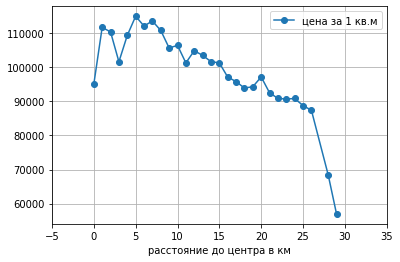

In [53]:
#сделаю срез по Санкт-Петербургу и построю сводную средних цен за 1 кв.м по каждому километру
spb_houseroom_clean = houseroom_clean.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='price_metr', aggfunc=['mean'])
#индексы перенесу в столбец с расстоянием
spb_houseroom_clean.reset_index(level=0, inplace=True)
#переименую столбцы
spb_houseroom_clean.columns = ['расстояние до центра в км','цена за 1 кв.м']
spb_houseroom_clean.plot(x='расстояние до центра в км', y='цена за 1 кв.м', style='o-', xlim=(-5, 35), grid=True)

#### Спад цены начинается примерно с 7-8 км, приму значение меньше 8 км за центр. Диапазон цены за 1 кв.м в центре от 95 до 115 тыс.

#### 4.7 Выделение сегмента квартир в центре. Изучение параметров: площадь, цена, число комнат, высота потолков. Определение факторов, которые влияют на стоимость квартиры. Отличие выводов от общих выводов по всему городу <a id="step4.7"></a> 

In [54]:
#делаю срез по квартирам в центре Санкт-Петербурга
center_spb_houseroom_clean = houseroom_clean.query('locality_name == "санкт-петербург" and cityCenters_nearest_km < 8')

Коэффициент корреляции между ценой за кв. метр и площадью: -0.50


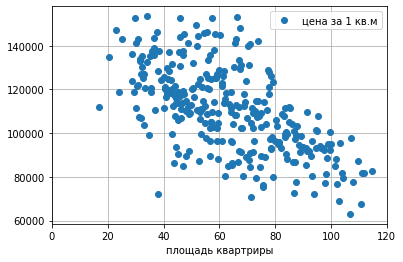

In [55]:
print('Коэффициент корреляции между ценой за кв. метр и площадью: {:.2f}'.format(center_spb_houseroom_clean['price_metr'].corr(center_spb_houseroom_clean['total_area'])))
center_spb_houseroom_clean_new = center_spb_houseroom_clean.pivot_table(index='total_area', values='price_metr', aggfunc=['mean'])
center_spb_houseroom_clean_new.reset_index(level=0, inplace=True)
center_spb_houseroom_clean_new.columns = ['площадь квартриры','цена за 1 кв.м']
center_spb_houseroom_clean_new.plot(x='площадь квартриры', y='цена за 1 кв.м', style='o', xlim=(0, 120), grid=True)

In [56]:
center_spb_houseroom_clean.pivot_table(index='rooms', values='price_metr', aggfunc=['mean'])

mean
          price_metr
rooms               
1      128618.740458
2      113420.562500
3      101013.005952
4       91601.886364
5       81560.750000
6       81981.000000

#### Отрицательная связь цены и площади в центре сохраняется, коэффициент Пирсона здесь равен -0,5. Густая зона это квартиры около 40 кв.м и ценой за квадрат от 115 до 140 тыс, что выше показателя по всей области.

Коэффициент корреляции между ценой и кол-вом комнат: 0.53


Text(0, 0.5, 'цена')

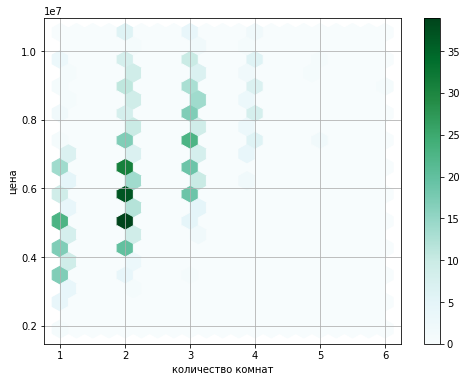

In [57]:
print('Коэффициент корреляции между ценой и кол-вом комнат: {:.2f}'.format(center_spb_houseroom_clean['rooms'].corr(center_spb_houseroom_clean['last_price'])))
center_spb_houseroom_clean.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel('количество комнат')
plt.ylabel('цена')

#### По прежнему связь не очень сильная между ценой и количеством комнат, тем не менее она сильнее, чем по всей области (коэффициент Пирсона 0,53 в сравнении с 0,46). Здесь в основном 2-комнатные квартиры с ценой 5-6 млн, хотя по прежнему есть 1-комнатные по такой же цене. А вот 3-комнатные уже дороже. На мой взгляд связь прослеживается значительно лучше.

Коэффициент корреляции между ценой и высотой потолков: 0.27


Text(0, 0.5, 'цена')

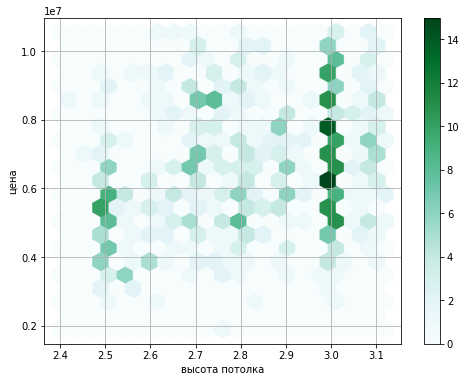

In [58]:
print('Коэффициент корреляции между ценой и высотой потолков: {:.2f}'.format(center_spb_houseroom_clean['ceiling_height'].corr(center_spb_houseroom_clean['last_price'])))
center_spb_houseroom_clean.plot(x='ceiling_height', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel('высота потолка')
plt.ylabel('цена')

#### Интересный факт получился, что в центре в основном квартиры с потолком 3 метра в разном ценовом диапазоне.

### 5. Общие выводы<a id="step5"></a> 

#### Исследуя объявления о продаже квартир можно сделать следующие выводы:

#### В основном продаются 1-2-3 комнатные квартиры площадью от 40 до 75 кв.м  с высотой потолка от 2,5 до 2,7 м;

#### Цена положительно зависит от площади и близости к центру, при этом выгоднее купить квартиру с бОльшим числом комнат, так как цена за квадратный метр будет ниже;

#### Средняя цена квадратного метра 1-комнатной квартиры - 99 тыс, 2-комнатной - 90 тыс, 3-комнатной - 83 тыс;

#### Квартиры в Санкт-Петербурге дороже, чем в области, соответственно и выше средние цены за квадратный метр: 1-комнатная - 128 тыс, 2-комнатная - 113 тыс, 3-х комнатная - 101 тыс

#### В центре Санкт-Петербурга в основном 2-комнатные квартиры с высокими потолками в 3 метра;

#### Высока вероятность продажи квартиры за 3-4 месяца, но есть случаи продажи за 1 день, а есть более 4 лет (хотя, возможно объявление не было снято с продажи вовремя);

#### На скорость продажи квартиры никак не влияет день, месяц или год публикации.